## Contents:

### 1. Importing libraries    
### 2. Importing data
### 3. The elbow technique
### 4. k-means clustering
### 5. Descriptive statistics
### 6. Inference and Conclusions   
### 7. Usefulness in future steps of an analytics pipeline

## Steps
### 1. Importing libraries 

In [33]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [34]:
# Ensure the graphs are displayed in notebook

%matplotlib inline

### 2. Importing Data
#### I have used the already cleaned file from a previous exercise.
#### I am using a subset of this data set to analyse which has all the numerical data and none of the categorical data.

In [35]:
# Creating a folder path 
path=r'/Users/jasmeetakaur/Downloads/Jasmeeta/Data Immersion Course/Achievement 6'

In [36]:
# Importing the already cleaned excel file from Task-6.2
df_unsup = pd.read_excel(os.path.join(path,'df_eco_profile_new.xlsx'))

In [37]:
df_unsup.head()

,Unnamed: 0,GeoFIPS,Average earnings per job (dollars),Earnings by place of work,Net earnings by place of residence,Per capita income maintenance benefits,Per capita personal income,Per capita unemployment insurance compensation,Population (persons),Total employment (number of jobs)
0,0,1001,39984,739418,1555278,919,43917,33,55869,18493
1,1,1003,38997,4661559,6178844,693,47485,29,223234,119535
2,2,1005,40885,477699,435544,1767,35763,33,24686,11684
3,3,1007,43208,298005,410984,1089,31725,30,22394,6897
4,4,1009,35325,564947,1299138,835,36412,31,57826,15993


In [38]:
sub = df_unsup[['Population (persons)', 'Total employment (number of jobs)', 'Per capita personal income']]

In [39]:
sub.describe()

,Population (persons),Total employment (number of jobs),Per capita personal income
count,3.138000e+03,3.138000e+03,3138.000000
mean,1.046015e+05,6.494885e+04,45577.662205
std,3.337549e+05,2.324139e+05,13818.072929
min,0.000000e+00,0.000000e+00,0.000000
25%,1.069400e+04,5.027250e+03,37741.000000
50%,2.563000e+04,1.241600e+04,43305.000000
75%,6.890475e+04,3.597850e+04,50640.250000
max,1.003911e+07,6.685737e+06,229825.000000


#### As is evident from the mean values listed as aresult of the describe function, the scale is almost similar and I dont need to standardize it.

In [40]:
# Find and remove outliers

Q1 = sub.quantile(0.25)
Q3 = sub.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5  # Adjust the threshold based on your needs


df_no_outliers = sub[~((sub < (Q1 - threshold * IQR)) | (sub > (Q3 + threshold * IQR))).any(axis=1)]


In [41]:
df_no_outliers.describe()

,Population (persons),Total employment (number of jobs),Per capita personal income
count,2583.000000,2583.000000,2583.000000
mean,31619.601239,16008.499419,43077.273326
std,31066.614047,16734.387134,8398.592523
min,169.000000,268.000000,19472.000000
25%,9561.000000,4512.500000,36895.500000
50%,20563.000000,9696.000000,41989.000000
75%,42545.500000,21369.000000,47964.500000
max,155299.000000,82029.000000,69700.000000


### 3. The elbow technique

In [42]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [43]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_no_outliers).score(df_no_outliers) for i in range(len(kmeans))] 

score

/Users/jasmeetakaur/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jasmeetakaur/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jasmeetakaur/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jasmeetakaur/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

[-3397164711096.0576,
 -1131189538746.146,
 -620871692778.3612,
 -454725717919.5174,
 -359773401042.42914,
 -300694293815.28284,
 -253453189789.17624,
 -229019978564.0556,
 -208098705734.32358]

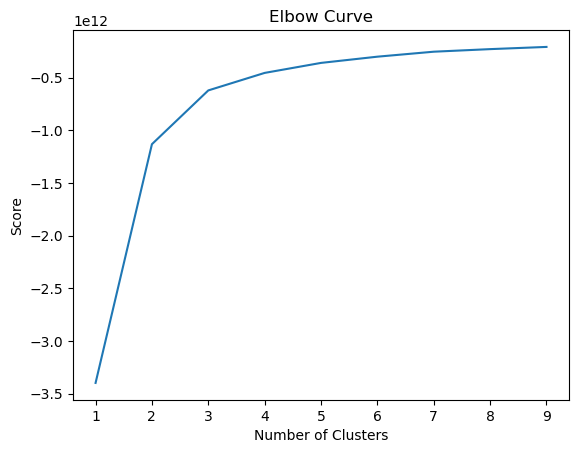

In [44]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The elbow (the breaking point of the curve) is where the curve begins to flatten. In this case, we can observe that it jumps from 2 to 3 on the X-axis and then increases slightly after 3. That's why I believe that the optimal number of clusters is 3.

### 4. k means clustering

In [45]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [46]:
# Fit the k-means object to the data.

kmeans.fit(df_no_outliers)

/Users/jasmeetakaur/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [47]:
df_no_outliers['clusters'] = kmeans.fit_predict(df_no_outliers)

/Users/jasmeetakaur/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/77/3dq_7lv50b1b4jqj7g8kp0880000gn/T/ipykernel_23033/2312207865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['clusters'] = kmeans.fit_predict(df_no_outliers)


In [48]:
df_no_outliers.head()

,Population (persons),Total employment (number of jobs),Per capita personal income,clusters
0,55869,18493,43917,2
2,24686,11684,35763,0
3,22394,6897,31725,0
4,57826,15993,36412,2
5,10101,4281,29080,0


In [49]:
df_no_outliers['clusters'].value_counts()

clusters
0    1653
2     671
1     259
Name: count, dtype: int64

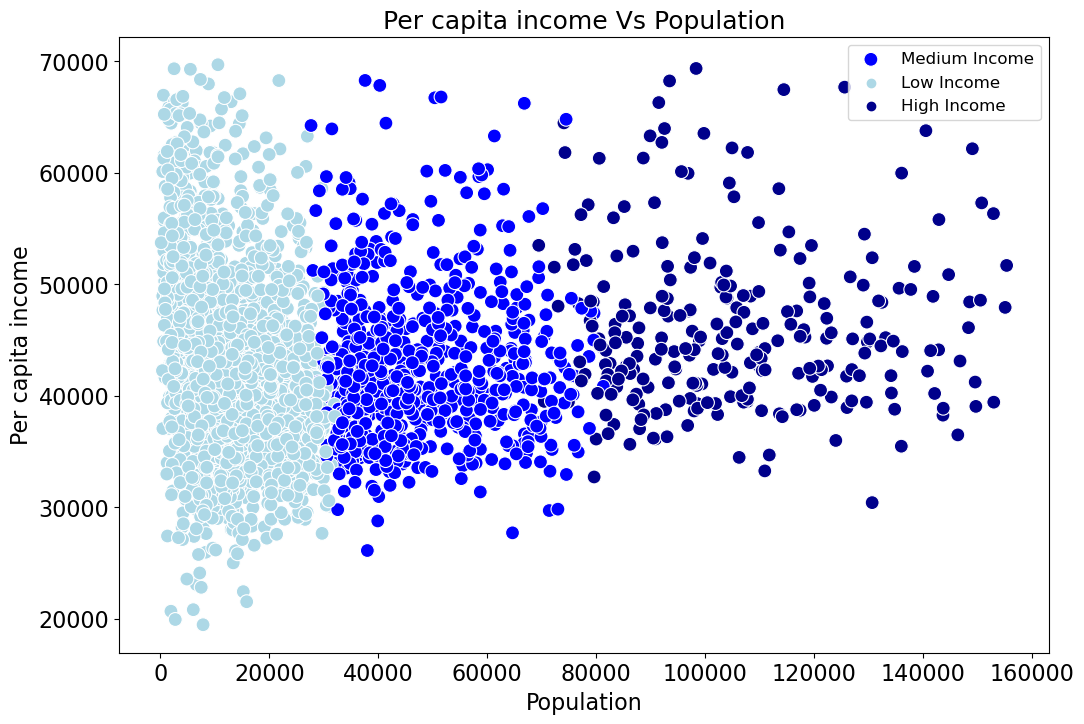

In [59]:
# Plot the clusters for the " Population (persons)" and "Total employment (number of jobs)" variables.

plt.figure(figsize=(12,8))
cluster_colors = ['lightblue',  'darkblue','blue']

ax = sns.scatterplot(x=df_no_outliers['Population (persons)'], y=df_no_outliers['Per capita personal income'], hue=kmeans.labels_, palette=cluster_colors, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
#plt.xlabel('Population (persons)') # Label x-axis.
#plt.ylabel('Per capita personal income') # Label y-axis.
ax.set_xlabel('Population', fontsize=16)
ax.set_ylabel('Per capita income', fontsize=16)
ax.set_title('Per capita income Vs Population', fontsize=18)
ax.tick_params(axis='both', which='both', labelsize=16)

custom_labels = ['Medium Income', 'Low Income', 'High Income']  # Replace with your desired labels

color_dict = dict(zip(custom_labels, cluster_colors))

# Change legend labels and colors
legend_labels = [f'{label}' for label, color in color_dict.items()]
ax.legend(legend_labels, fontsize=12)


plt.savefig('cluster_plot_population_income.png')
plt.show()

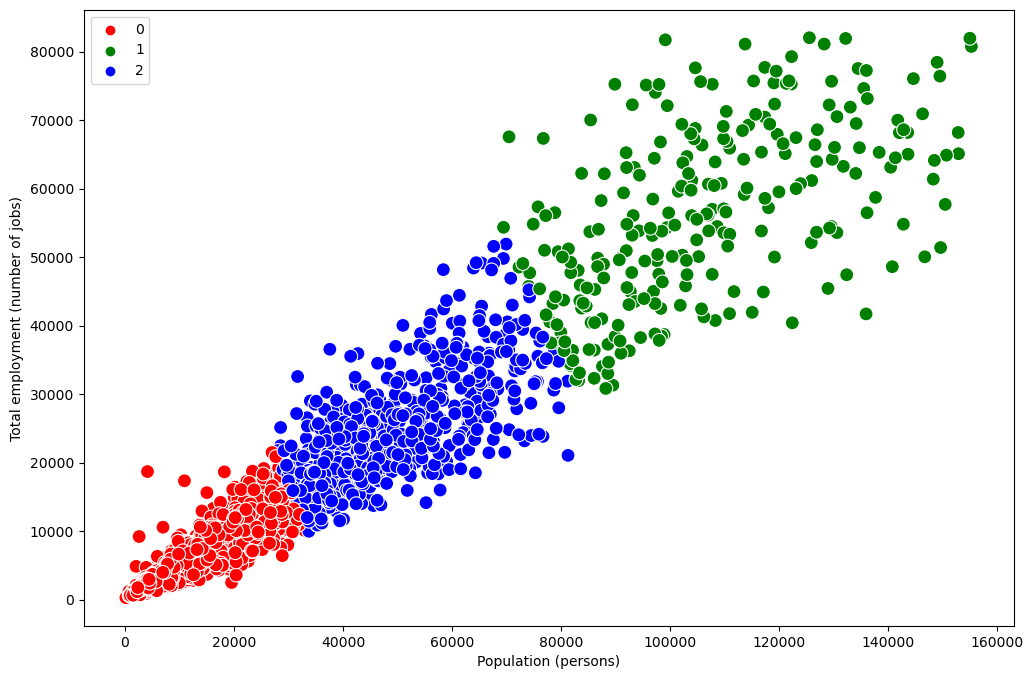

In [60]:
# Plot the clusters for the " Population (persons)" and "Total employment (number of jobs)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_no_outliers['Population (persons)'], y=df_no_outliers['Total employment (number of jobs)'], hue=kmeans.labels_, palette=cluster_colors, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population (persons)') # Label x-axis.
plt.ylabel('Total employment (number of jobs)') # Label y-axis.
plt.show()

### 5. Descriptive statistics

In [58]:
df_no_outliers.loc[df_no_outliers['clusters'] == 0, 'cluster'] = 'red'
df_no_outliers.loc[df_no_outliers['clusters'] == 2, 'cluster'] = 'blue'
df_no_outliers.loc[df_no_outliers['clusters'] == 1, 'cluster'] = 'green'


In [59]:
df_no_outliers.groupby('cluster').agg({'Population (persons)':['mean', 'median','min','max'], 
                         'Per capita personal income':['mean', 'median', 'min','max'], 
                         'Total employment (number of jobs)':['mean', 'median', 'min','max'],
                          })

Population (persons)                           \
                        mean    median    min     max   
cluster                                                 
blue            48013.393713   45177.0  28009   81289   
green          105958.451737  103107.0  69451  155299   
red             13379.978261   12243.0    169   32924   

        Per capita personal income                         \
                              mean   median    min    max   
cluster                                                     
blue                  42872.781437  41849.0  26128  68291   
green                 46180.181467  44909.0  30423  69365   
red                   42674.463768  41454.0  19472  69700   

        Total employment (number of jobs)                         
                                     mean   median    min    max  
cluster                                                           
blue                         24200.633234  22957.5   9968  51902  
green                        56055.073359  54812.0  30826  82029  
red                           6440.620169   5620.0    268  21470

### 6. Inference and conclusions 

#### 1. While there was no visible linear connection between  Population and Per capita personal income  in my previous exploratory analysis, in task-6.2,  new clusters have shed light on some trends in the data that weren’t visible before.
#### 2. Quite clearly the green clusters in the scatter plot of Population Vs Per capita personal income that represent high population region, also have higher average per capita personal income. 
#### 3. A further inference that can be deduced from this is that in the developed nations like US which this data is based on, higher population leads to more prosperous regions on average.
#### 4.  Also the lowest population 'red' cluster group exhibits both the lowest and the highest per capita income groups. 
#### 5. The inference that can be deduced from this is that even the low populated regions are one of the  most prosperous. 
#### 6. Finally as far as the plot between Population and Total employment is concerned, no new patterns have been observed. There was already a strong linear relationship observed between the two.
#### 7. The inference that can be deduced is that there are greater employment opportunities in the regions with higher population.

### 7. Usefulness in future steps of an analytics pipeline

#### 1. In the previous exercises, I did't explore further relationship for those variables that showed low correlation in the correlation matrix. 
#### 2.  But when I plotted the scatter plot using k mean cluster scatter plot it showed non-linear patterns that were not obvious.
#### 3. In future for further analystics I can make similar scatter plots between all involved variables which may not already show linear correlation, to uncover similar non-linear patterns.
#### 4. This can help me to get more insights that are not linear or simple correlations.

